In [1]:
!pip install gensim scikit-learn matplotlib nltk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 43.7 MB/s eta 0:00:00


In [2]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import nltk

nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
corpus = [
    "Machine learning is a part of artificial intelligence",
    "Deep learning uses neural networks",
    "Natural language processing deals with text data",
    "Word embeddings represent words as vectors",
    "Chatbots use NLP and machine learning"
]


In [5]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [6]:
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]
print(tokenized_corpus)


[['machine', 'learning', 'is', 'a', 'part', 'of', 'artificial', 'intelligence'], ['deep', 'learning', 'uses', 'neural', 'networks'], ['natural', 'language', 'processing', 'deals', 'with', 'text', 'data'], ['word', 'embeddings', 'represent', 'words', 'as', 'vectors'], ['chatbots', 'use', 'nlp', 'and', 'machine', 'learning']]


In [7]:
model = Word2Vec(
    sentences=tokenized_corpus,
    vector_size=100,
    window=5,
    min_count=1,
    workers=4
)


In [8]:
words = list(model.wv.index_to_key)[:10]
word_vectors = [model.wv[word] for word in words]

print(words)


['learning', 'machine', 'and', 'nlp', 'use', 'chatbots', 'vectors', 'as', 'words', 'represent']


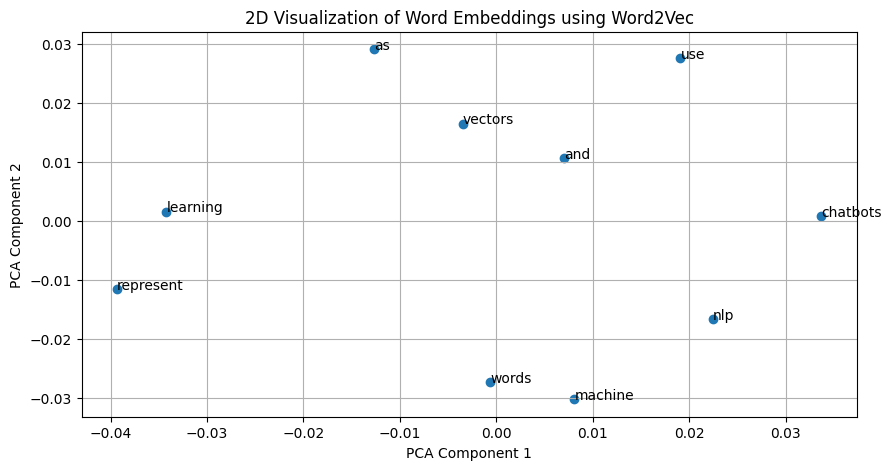

In [9]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 5))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))

plt.title("2D Visualization of Word Embeddings using Word2Vec")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()
